# Python ML Labs project - Prediction of Stroke

Author: Samd Guizani

Cohort: A23 (SPOC)

## Problem Statement

The objective of the study is to propose a model that predicts whether a patient has stroke or not, based on descriptors (such as age, gender, existing discease, etc.)

The dataset contains the following variables:
1) **id**: unique patient identifier
2) **gender**: “Male”, “Female” or “Other”
3) **age**: age of the patient
4) **hypertension**: 0 (if the patient doesn’t have hypertension) or 1 (if the patient has hypertension)
5) **heart_disease**: 0 (if the patient doesn’t have a heart disease) or 1 (if the patient has a heart disease)
6) **ever_married**: “No” or “Yes”
7) **work_type**: “children”, “Govt_job”, “Never_worked”, “Private” or “Self-employed”
8) **Residence_type**: “Rural” or “Urban”
9) **avg_glucose_level**: average glucose level in the blood
10) **bmi**: body mass index
11) **smoking_status**: “formerly smoked”, “never smoked”, “smokes” or “Unknown” (in this case the information for the patient is not available)
12) **stroke**: 1 (if the patient had a stroke) or 0 (if the patient didn’t have a stroke)

**stroke** is the target variable to be predicted. It is a binary value (0 or 1), hence the model to develop is a ***classification*** model.

## Imports and loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
path_to_dataset = './Inputs/stroke_data.csv'
df = pd.read_csv(path_to_dataset, sep=',', index_col='id')

In [9]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [29]:
n, d = df.shape
print(f'Number of observations: {n}')
print(f'Number of variables: {d}')

Number of observations: 5110
Number of variables: 11


In [43]:
vars = df.columns
print('List of all variables:\n')
for i, c, in enumerate(vars):
    print(i, c)

List of all variables:

0 gender
1 age
2 hypertension
3 heart_disease
4 ever_married
5 work_type
6 Residence_type
7 avg_glucose_level
8 bmi
9 smoking_status
10 stroke


In [66]:
# Group variables in continuous and categorical
continuous_vars = df.columns[[1, 7, 8]]
categorical_vars = df.columns[[0, 2, 3, 4, 5, 6, 9, 10]]

# Display levels of categorical variables
[print(cat_var, df[cat_var].unique()) for cat_var in categorical_vars]

gender ['Male' 'Female' 'Other']
hypertension [0 1]
heart_disease [1 0]
ever_married ['Yes' 'No']
work_type ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type ['Urban' 'Rural']
smoking_status ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke [1 0]


[None, None, None, None, None, None, None, None]

## Exploratory Data Analysis

In [69]:
# Display count of NA values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Exploring univariate continuous variables

In [67]:
df[continuous_vars].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


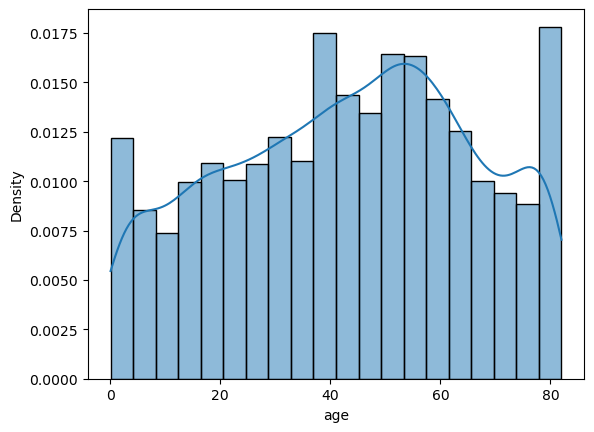

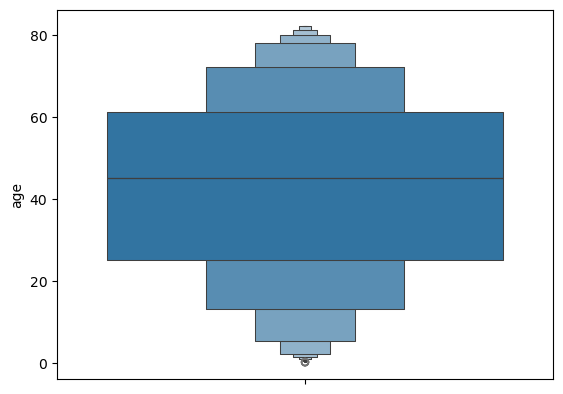

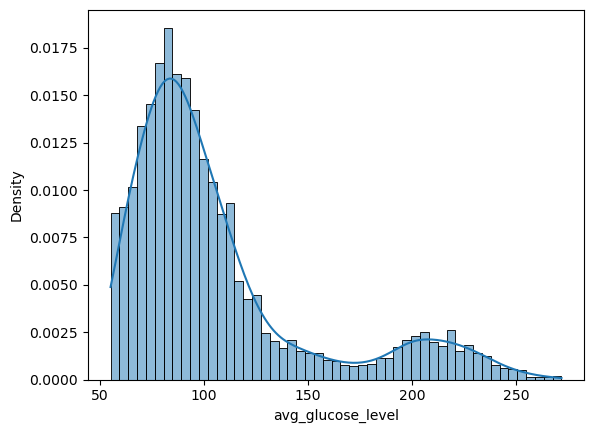

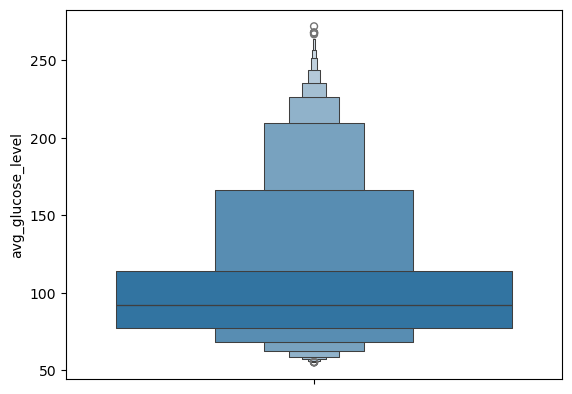

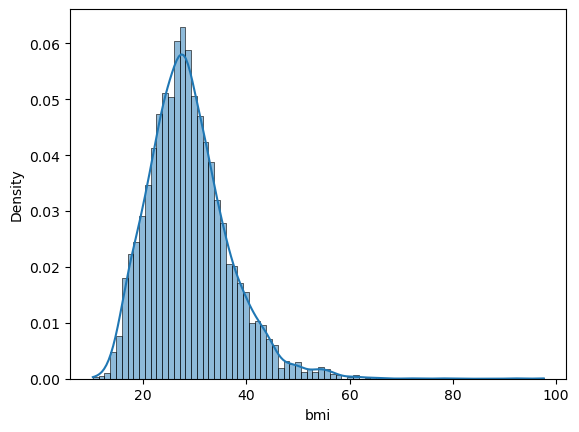

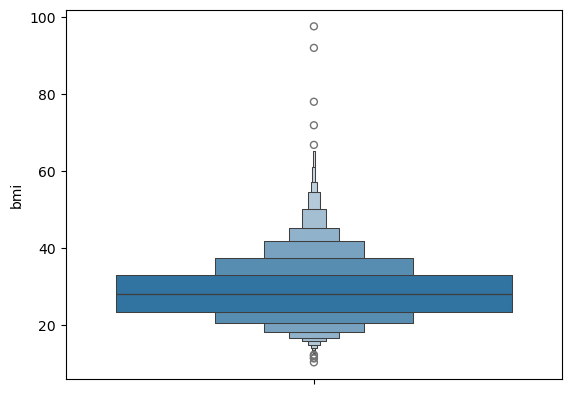

In [87]:
for cont_var in continuous_vars:
    plt.figure()
    sns.histplot(df[cont_var], kde=True, stat='density')
    plt.show()
    
    plt.figure()
    sns.boxenplot(df[cont_var])
    plt.show()

In [90]:
df.loc[(df.bmi >= 65) | (df.bmi <=15), :].sort_values(by='bmi')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
38043,Female,1.24,0,0,No,children,Rural,122.04,10.3,Unknown,0
3205,Female,79.00,0,0,Yes,Self-employed,Urban,79.03,11.3,Unknown,0
59993,Male,40.00,0,0,Yes,Private,Rural,60.96,11.5,never smoked,0
20364,Female,4.00,0,0,No,children,Urban,107.25,12.0,Unknown,0
45893,Female,8.00,0,0,No,children,Urban,106.51,12.3,Unknown,0
53924,Female,1.08,0,0,No,children,Urban,159.39,12.8,Unknown,0
41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
52859,Female,4.00,0,0,No,children,Urban,61.54,13.2,Unknown,0
31113,Female,1.16,0,0,No,children,Urban,86.00,13.3,Unknown,0


### Exploring univariate categorical varibales

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 



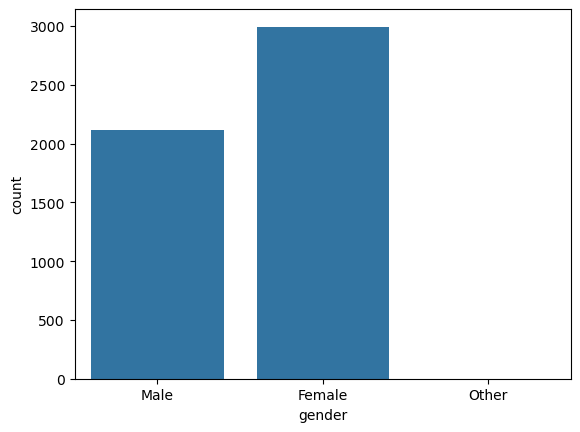

hypertension
0    4612
1     498
Name: count, dtype: int64 



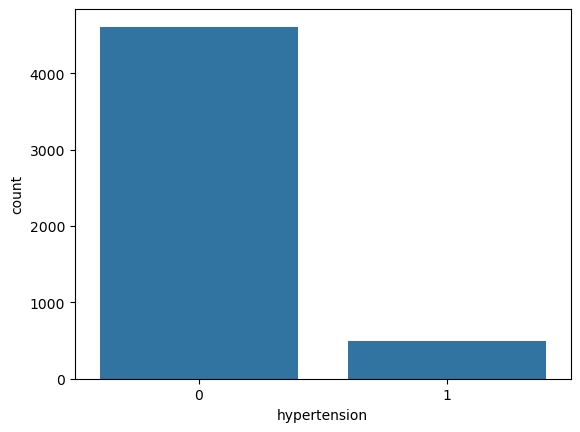

heart_disease
0    4834
1     276
Name: count, dtype: int64 



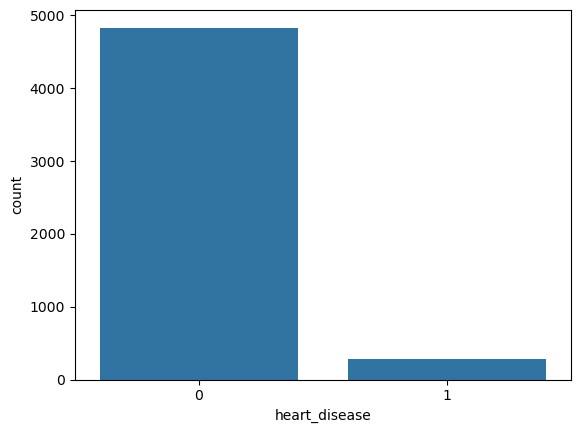

ever_married
Yes    3353
No     1757
Name: count, dtype: int64 



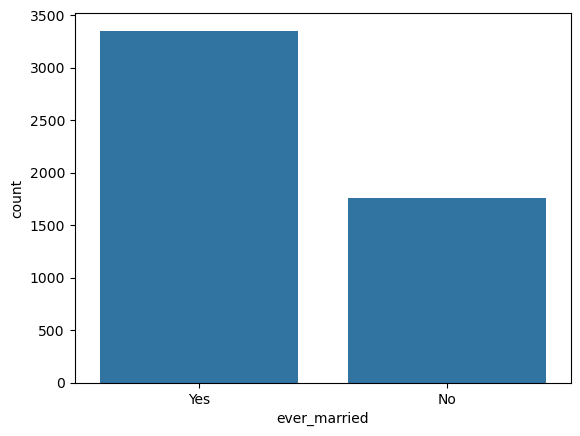

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 



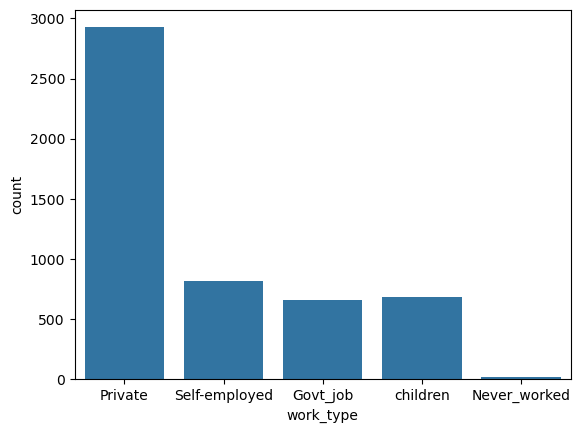

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64 



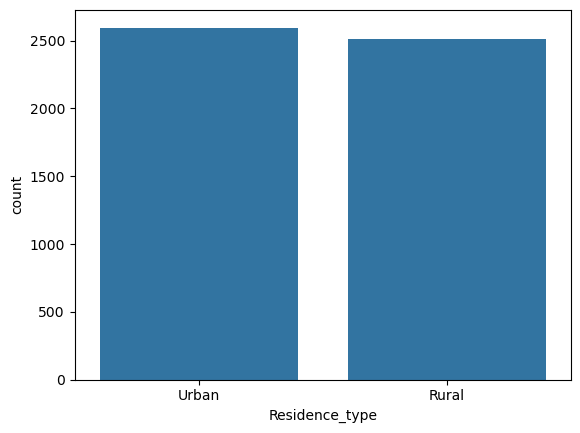

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64 



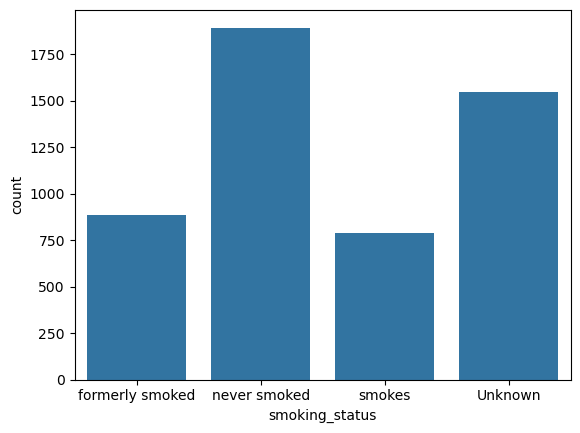

stroke
0    4861
1     249
Name: count, dtype: int64 



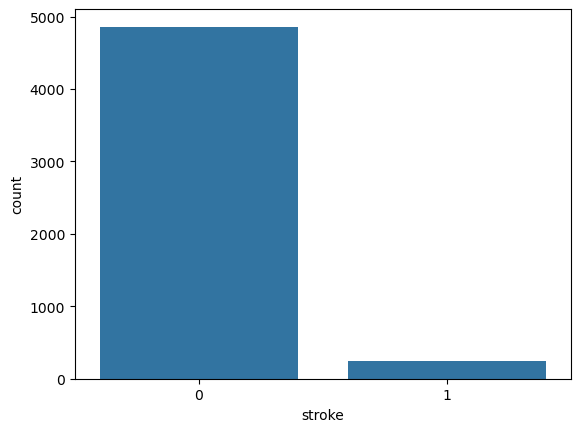

In [97]:
for cat_var in categorical_vars:
    print(df[cat_var].value_counts(), '\n')
    plt.figure()
    sns.countplot(df, x=cat_var)
    plt.show()

In [111]:
df.loc[df.gender == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [112]:
# Dropping 1 observation corresponding to gender == 'Other' (only one observation, no stroke)
df = df.drop(index=df.loc[df.gender == 'Other'].index)

df.shape

(5109, 11)

In [119]:
df.loc[df.work_type == 'Never_worked'].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
34900,Male,13.0,0,0,No,Never_worked,Urban,85.08,14.6,Unknown,0
16556,Male,13.0,0,0,No,Never_worked,Rural,111.48,20.8,Unknown,0
13862,Female,13.0,0,0,No,Never_worked,Urban,70.93,22.9,never smoked,0
46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
57274,Male,14.0,0,0,No,Never_worked,Urban,137.91,41.8,never smoked,0
61219,Female,14.0,0,0,No,Never_worked,Urban,148.37,22.7,never smoked,0
69559,Male,15.0,0,0,No,Never_worked,Urban,64.29,16.7,Unknown,0
28461,Male,15.0,0,0,No,Never_worked,Rural,79.59,28.4,Unknown,0
23587,Female,16.0,0,0,No,Never_worked,Urban,84.40,25.9,never smoked,0


In [129]:
df.loc[df.work_type == 'children'].age.describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

### Exploring multivariate relations

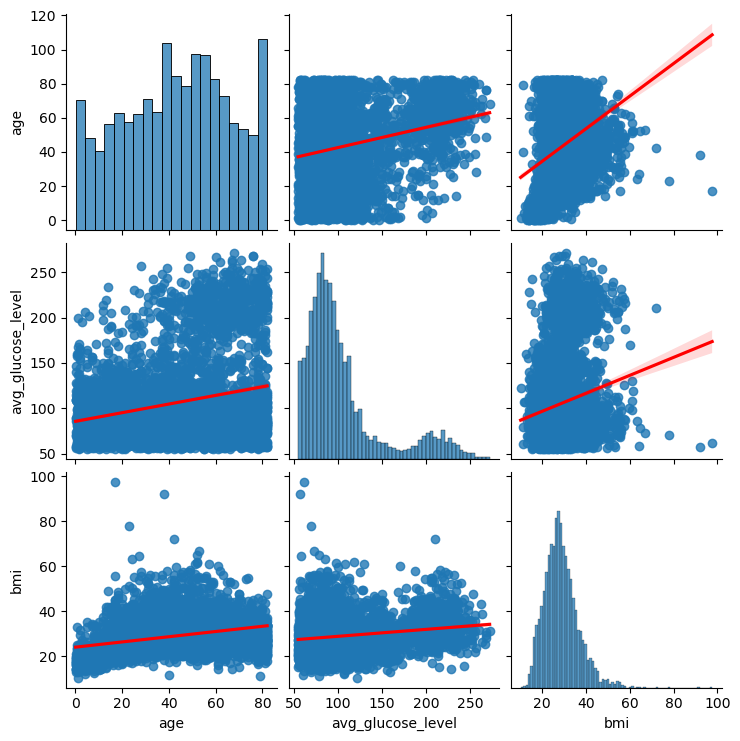

In [113]:
# Pairwise correlation between continuous variables
sns.pairplot(df[continuous_vars], kind='reg', plot_kws={'line_kws':{'color':'red'}})
plt.show()

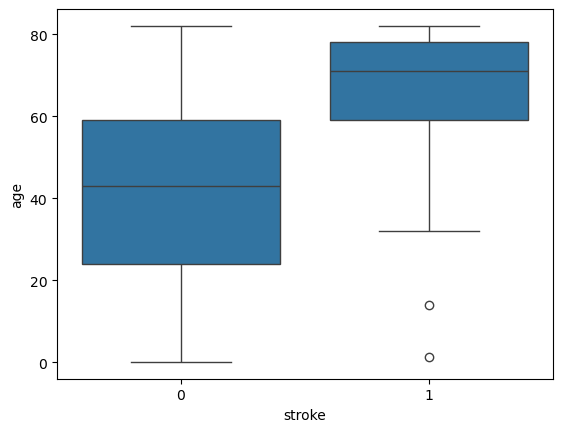

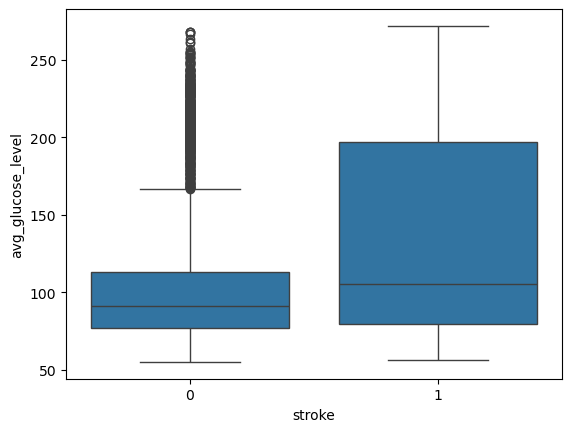

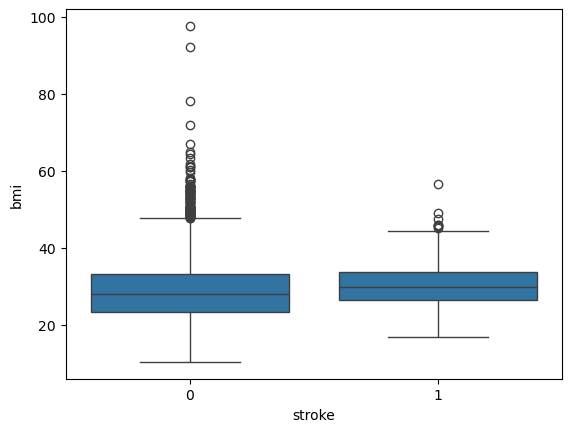

In [124]:
for cont_var in continuous_vars:
    plt.figure()
    sns.boxplot(df, x='stroke', y=cont_var)
    plt.show()

stroke         0         1
gender                    
Female  0.587037  0.566265
Male    0.412963  0.433735


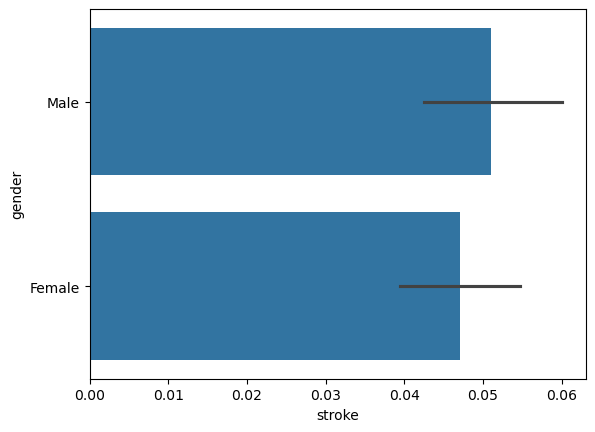

stroke               0        1
hypertension                   
0             0.911111  0.73494
1             0.088889  0.26506


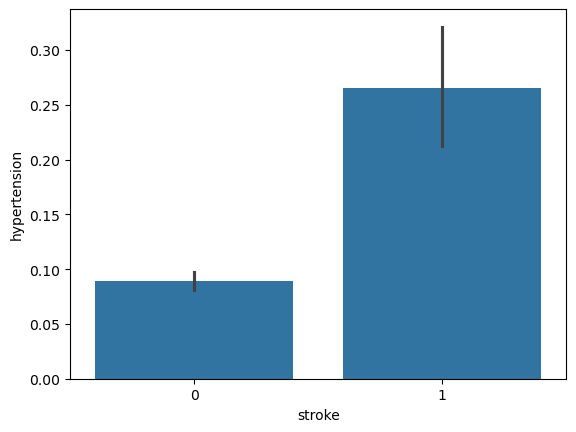

stroke                0         1
heart_disease                    
0              0.952881  0.811245
1              0.047119  0.188755


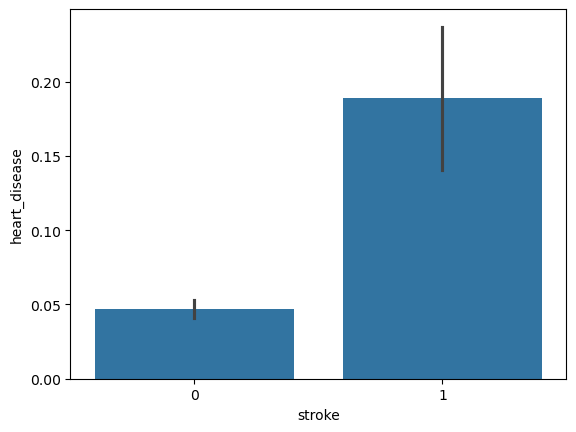

stroke              0         1
ever_married                   
No            0.35535  0.116466
Yes           0.64465  0.883534


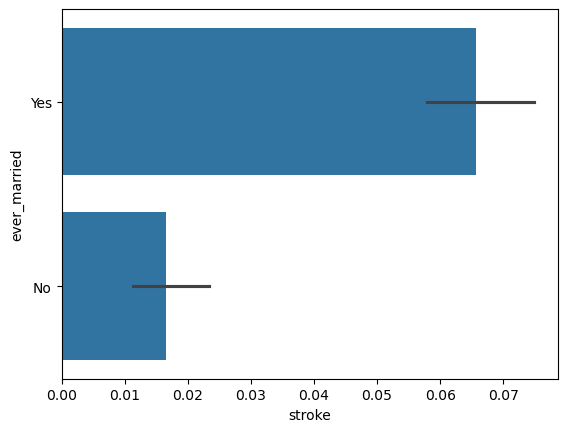

stroke                0         1
work_type                        
Govt_job       0.128395  0.132530
Never_worked   0.004527  0.000000
Private        0.570988  0.598394
Self-employed  0.155144  0.261044
children       0.140947  0.008032


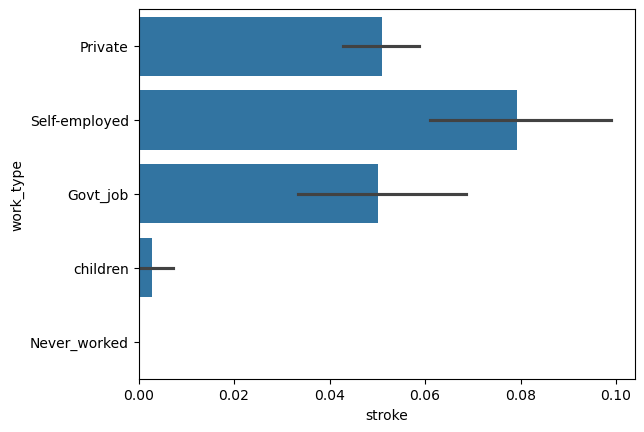

stroke                 0         1
Residence_type                    
Rural           0.493621  0.457831
Urban           0.506379  0.542169


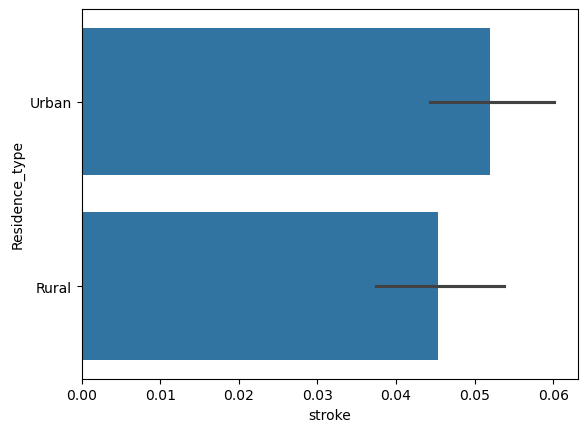

stroke                  0         1
smoking_status                     
Unknown          0.308025  0.188755
formerly smoked  0.167490  0.281124
never smoked     0.370782  0.361446
smokes           0.153704  0.168675


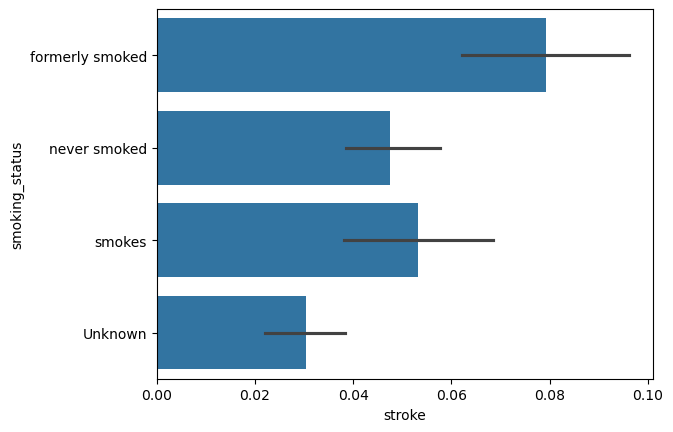

stroke    0    1
stroke          
0       1.0  0.0
1       0.0  1.0


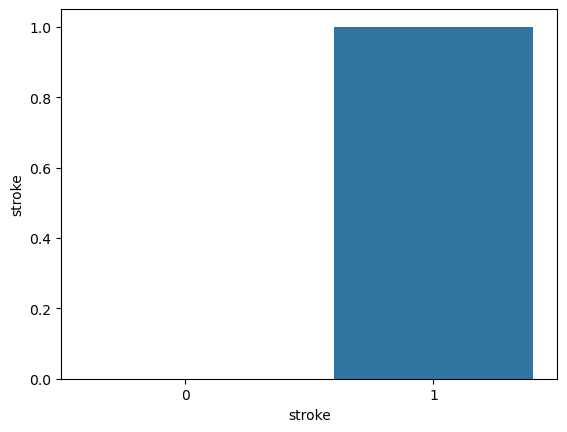

In [134]:
for cat_var in categorical_vars:
    contingency_table = pd.crosstab(df[cat_var], df['stroke'])
    print(contingency_table.div(contingency_table.sum(axis=0), axis=1))
    plt.figure()
    sns.barplot(df, x='stroke', y=cat_var)
    plt.show()